# History

<p style="font-family: Arial; font-size:1.2em;color:black;"> On the day, 19 April 1912 at 11.40 pm! one of the darkest moments in history. Royal Mail Ship Titanic (commonly known as Titanic) en route to New York from Southampton sank after colliding with an iceberg killing around 1500 passengers and ship personnel. It was Titanic's maiden voyage. On a windy night, as Titanic sailing in the sea with beaming lights and a party-atmosphere among the passengers, Captain Edward J Smith, a man with more than 40 years at sea under his belt and who had previously captained Titanic’s sister ship, Olympic, recieved the warning message telling: 'bergs, growlers and field ice. Unfortunately, Captain Smith could not save the ill-fated Titanic. </p>


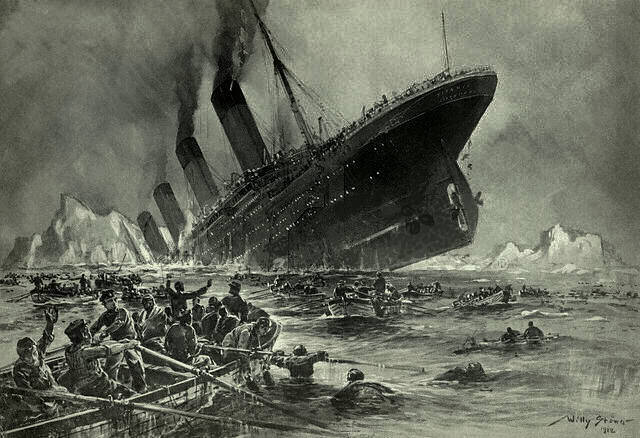

<p style="font-family: Arial; font-size:1.2em;color:black;">The Titanic was the largest ship afloat at the time. Titanic was 882 feet (269 meters) long, she measured in at over 100 feet longer and over fifty percent heavier than their nearest rival. Ironically, Titanic was marketed by White Star Line as the world’s first and last “Unsinkable Ship.” </p>

# DataSet

DataSet contains details of 891 passengers. Passengers' details include following columns as variables:

- Passenger ID: Unique ID for each passenger



- Survived: It includes numerical values 0 and 1, where,

                 0 ---> Passenger is deceased
                 1 ---> Passenger is survived
               
- Pclass: The column includes details about passenger class. It also represents socio economic status of the passenger. Different passenger classes involve in the data were:

                 1 ---> Class 1 passengers are usually with rich people and provided with additional services
                 2 ---> Class 2 passengers were provided with intermediate benefits 
                 3 ---> Class 3 passengers were usually poor or medium class people.
                 

- name: Name of the passengers



- Sex: Gender of the passenger



- Age: Age of the passenger



- SibSp: Wheahter the passenger is travelling with the Sibling or Spouse. Column value indicates the number of Sibling and Spouse travelling with the passenger



- Parch: Wheather the passenger is travelling with the Parents or Children. Column value indicates the number of family including Parents and children



- Ticket: Ticket number bought by the passenger



- Fare: Fare price of the ticket



- Cabin: Cabin number allocated to the passenger



- Embarked: There were 3 ports where passengers boarded on the ship. These ports were namely:
                             
                  S ---> Southampton
                  C ---> Cherbourg
                  Q ---> Queenstown

# Outline

The project is aimed at diving deep into the titanic dataset and find out some valuable but harsh insights. Some observations touch on the harsh reality of socio-economic nature of the society. Once we understand and process the data for machine learning models for prediction, we will apply 6 different classifiers on the training set and compare the prediction results. We will then create <font color='tomato'>**classifier grid**</font>, a pivot table to compare the performance of the different classifiers. Resultant of the comparision will lead to Classifier selection. But we will not stop here! The last section will be dedicated to understand and interprete performance of the selected model.

Here is the short and sweet outline of this project:

- Undetstanding the dataset   
- Exploratory Data Analysis
- Feature Engineering
- Data Preperation
- Model Creation
- Model Selection
- Preformance Metrics
- Submission

      

# Importing Libraries

In [1]:
# Basic libraries
import numpy as np
import pandas as pd

# Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from matplotlib.pyplot import rcParams

# Image library
import matplotlib.image as image

# Libraries for data processing
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
from fancyimpute import KNN, IterativeImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin

# Machine Learning Models
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Hypertuning
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Performance Metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import precision_recall_curve, roc_curve, roc_auc_score

# Warings
import warnings
warnings.filterwarnings('ignore')

# setting up matplotlib to use jupyter's own backend for visualisation
%matplotlib inline

## Setting format and background

In [2]:
sns.set_style('darkgrid')
rcParams['figure.figsize'] = [8,8]

# Reading CSV file

In [3]:
df_train= pd.read_csv('train.csv')
df_test = pd.read_csv("test.csv")
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Understanding the DataSet

In [4]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- <font color="darkviolet"> Out of the total passengers, 38.38% of passengers survived
- <font color="darkviolet"> The age of passengers ranges from 0.42 to 80 years with the median at 28 years
- <font color="darkviolet"> Median Fare was 14.5 USD. 25th and 75th quantiles are at 8 USD and 31 USD. However, the maximum fare was 512 USD indicating there are outliers in the Fare.

In [5]:
# checking duplicated values
df_train.duplicated().sum()

0

<font color="darkviolet"> There are no duplicate values in the dataset

# Exploratory Data Analysis

## Pie Charts: Univariate Analysis

In [6]:
# Extracting unique values from all columns
dict_uniques= {}

for col in df_train:
    
    if len(df_train[col].unique())< 5:
        
        dict_uniques[col]=df_train[col].unique()
                                
        
    else:
        continue
        
print(dict_uniques)

{'Survived': array([0, 1]), 'Pclass': array([3, 1, 2]), 'Sex': array(['male', 'female'], dtype=object), 'Embarked': array(['S', 'C', 'Q', nan], dtype=object)}


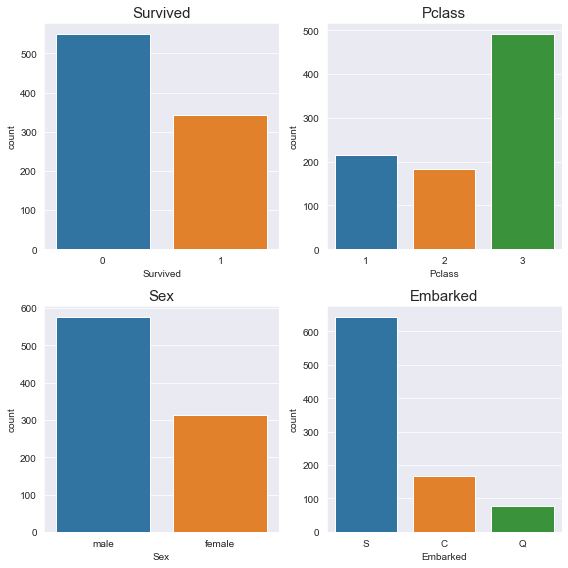

In [7]:
columns= dict_uniques.keys()

fig, ax= plt.subplots(2,2, figsize=(8,8))

for col, ax in zip(columns, ax.flatten()):
    sns.countplot(df_train[col], ax=ax)
    ax.set_title(col.title(), fontsize=15)
   
    plt.tight_layout()

- <font color="darkviolet"> Tragically, 549 passengers i.e 62% of total passengers, lost their lives in the disaster. Only 342 passengers survived the accident
- <font color="darkviolet"> Death rate was much higher than the survival rate.
- <font color="darkviolet"> Maximum passengers were in class 3 which is more than double the passengers in class 1 and class 2 each
- <font color="darkviolet"> The number of male passengers was almost twice that of female passengers
- <font color="darkviolet"> Most of the passengers embarked on the ship at Port Southampton(S) which is almost 4 times that of port C and 9 times that of Port Q.


## Survival analysis

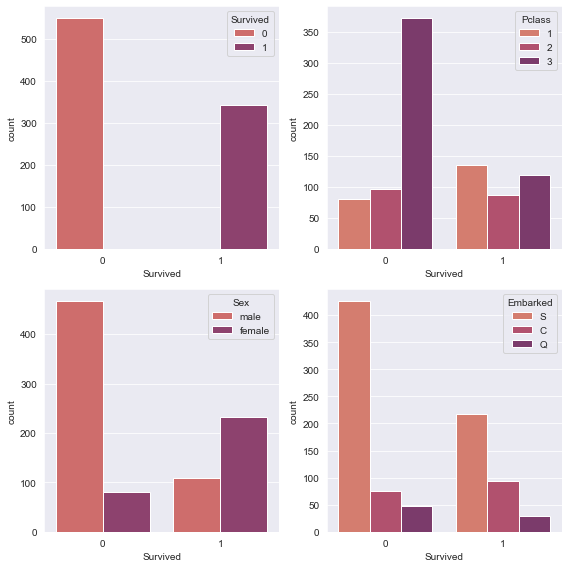

In [8]:
hue= dict_uniques.keys()
fig, ax=plt.subplots(2,2, figsize=(8,8))

for col, ax in zip(hue, ax.flatten()):
    
    sns.countplot(x='Survived', data=df_train, hue=col, ax=ax, palette='flare');

plt.tight_layout()


- The last message that was relayed from Royal Mail Steamer Titanic was - “Sinking by the head. Have cleared boats and filled them with women and children. Then men – by far the greater part of them – remained to die, millionaire and peasant, and man of the middle class, alike, bravely, it must have been, sharing each other’s fate and going down to a common grave.”. Men were all up to save women and children. <font color="darkviolet"> As a result, we can see that around 85% of people who died were men and the remaining 15% were female.</font>

- As class 3 passengers were confined to their areas, they were heavily hit by the breakage. One of the survivors told in an interview that, they were not allowed to go to any part of the ship except the deck. Each class was separated from the others using the grilled gate. As the steward did not get time to open these gates, passengers in 3rd class sank in the water flooded in Titanic. It might also be possible that, since the passenger in class 1 and 2 were comparatively richer than passengers in class 3, they could have offered money to stewards for arrangements to save their lives
- <font color="darkviolet"> We can also see that most of the people who embarked on the ship at port S died in the tragedy. </font>


Sources: 

@ Deb Kiner, https://www.pennlive.com/life/2021/04/the-men-remained-to-die-the-sinking-of-the-rms-titanic-in-1912.html)

(https://www.youtube.com/watch?v=_xKDRmhp6lQ)

(https://abc13.com/titanic-anniversary-immigration-world-history/1874040/#:~:text=The%20reason%20why%20many%20more,from%20interacting%20with%20each%20other.)

## Analysing Age Distribution

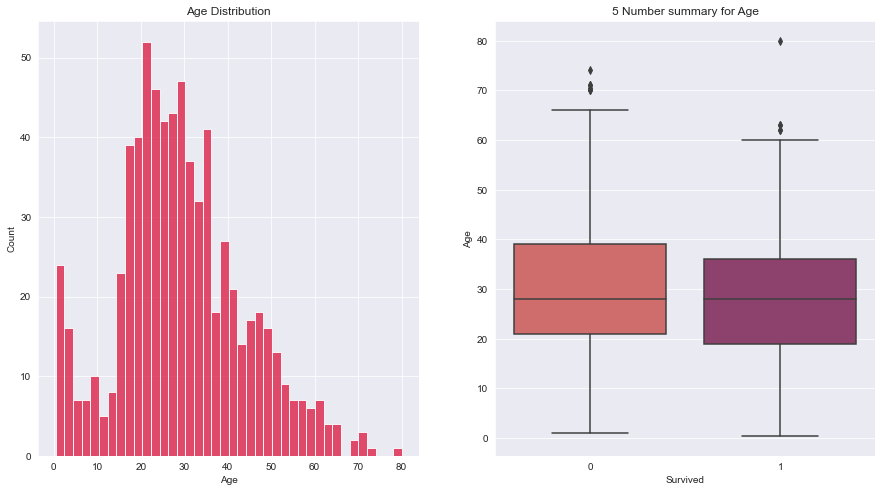

In [9]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.histplot(x='Age', data=df_train, kde=False, bins=40, color='crimson')
plt.title('Age Distribution')

plt.subplot(1,2,2);
sns.boxplot(y='Age', x='Survived', data=df_train, palette='flare')
plt.title("5 Number summary for Age");


- <font color="darkviolet"> From the age distibution we can see that most of passengers were of age between 18 to 40 years. Age distribution is right skewed as age is dispersed more on the right side
- <font color="darkviolet"> Age is appeared to be more dispersed on the higher side for passengers who lost their lives. The median age of both dead and survived looks almost the same. There are few outliers present in the Age column

#### Creating bins for Age

In [10]:
not_survived= df_train[df_train["Survived"]==0]

In [11]:
not_survived["age_cat"] =pd.cut(df_train["Age"],
                        bins = [0,18,36,54,72, np.Inf],
                        labels=[1,2,3,4,5])

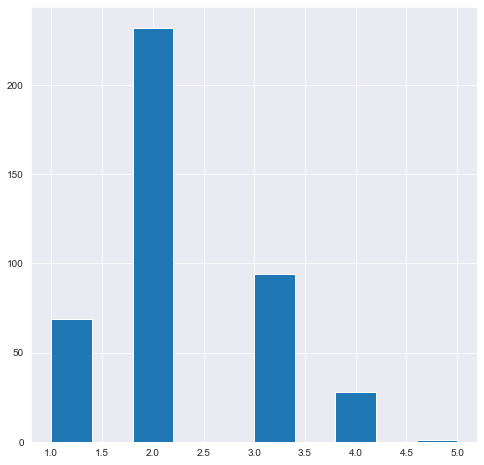

In [12]:
not_survived["age_cat"].hist();

<font color="darkviolet">Maximum number of passengers who did not survive were between age group 18 to 36 years

## Fare Distribution

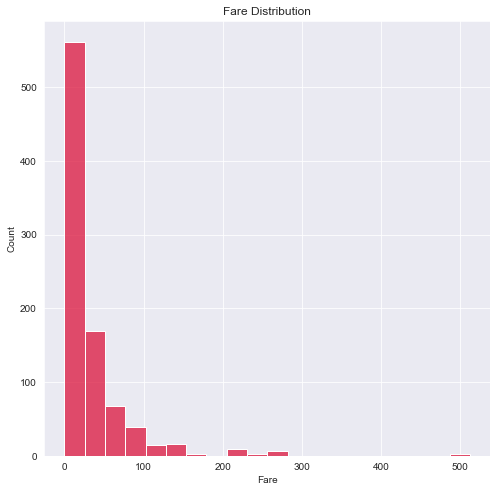

In [13]:
sns.histplot(x='Fare', data=df_train, bins=20, color='crimson')
plt.title('Fare Distribution');

In [14]:
not_survived["fare_cat"] =pd.cut(df_train["Fare"],
                        bins = [0,30,60,90,120, np.Inf],
                        labels=[1,2,3,4,5])

<AxesSubplot:>

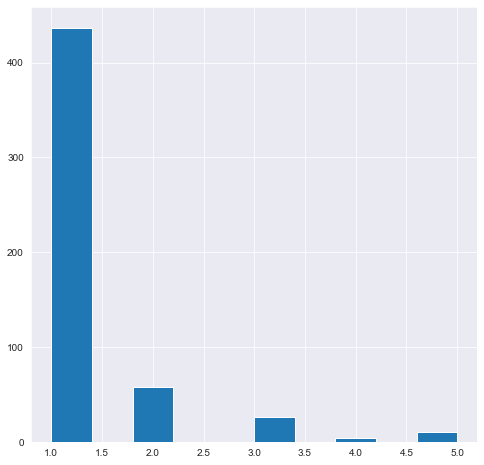

In [15]:
not_survived["fare_cat"].hist()

<font color="darkviolet"> The fare is not normally distributed. There are many outliers present in the data. Instead of relying on fare column, we will create bins (Classed)) to group the passengers based on the fare. First we have fitered out the passengers who lost their lives. Then we have created 5 bins for fares such as 0-30, 30-60, 60-90, 90-120 and more than 120 USD. We can see that maximum number of passengers who lost their lives, paid fare between 0 to 30 USD.

## Fare vs Age

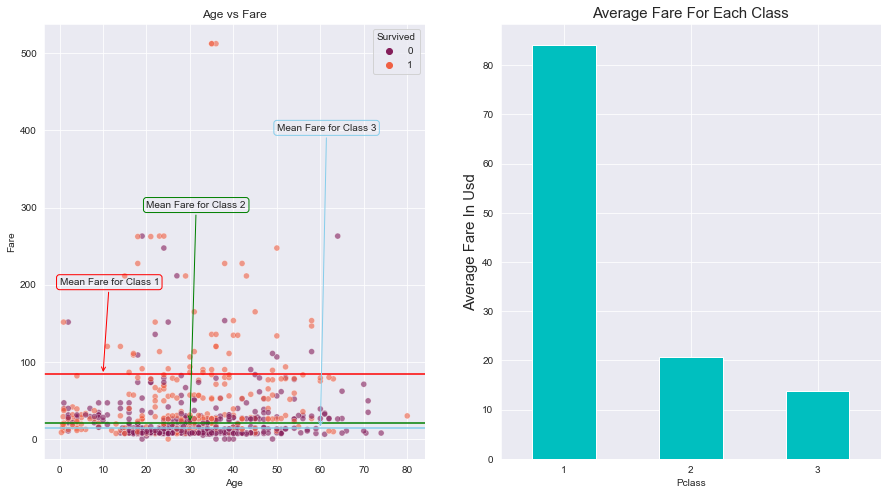

In [16]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
sns.scatterplot(x='Age',y='Fare', data=df_train, hue='Survived',palette='rocket', alpha=0.6)
df_class= df_train.groupby('Pclass')['Fare'].mean()
plt.axhline(y=84.15, c='r', label='Class 1')
plt.axhline(y=20.66, c='g', label='Class 2')
plt.axhline(y=13.67, c='skyblue', label='Class 3')
#plt.legend(['Class 1', 'Class 2','Class3','0','1'])
plt.title('Age vs Fare')
plt.annotate('Mean Fare for Class 1', (10, 84.15), (0, 200),
            arrowprops=dict(arrowstyle="->",connectionstyle="Arc3", color="r"),
            bbox = dict(boxstyle = "round", fc ="none", ec="r"))

plt.annotate('Mean Fare for Class 2', (30, 20.66), (20, 300),
            arrowprops=dict(arrowstyle="->",connectionstyle="Arc3", color="g"),
            bbox = dict(boxstyle = "round", fc ="none", ec="g"))

plt.annotate('Mean Fare for Class 3', (60, 13.67), (50, 400),
            arrowprops=dict(arrowstyle="->",connectionstyle="Arc3", color="skyblue"),
            bbox = dict(boxstyle = "round", fc ="none", ec="skyblue"))

plt.subplot(1,2,2)
df_class= df_train.groupby('Pclass')['Fare'].mean()
df_class.plot(kind='bar', color='c')
plt.xticks(rotation=360)
plt.title('Average Fare for each class'.title(), fontsize=15)
plt.ylabel('Average Fare in USD'.title(), fontsize=15);

In [17]:
print('Relationship between Age and Fare:', df_train['Age'].corr(df_train['Fare']))
print('Relationship between Pclass and Fare:', df_train['Pclass'].corr(df_train['Fare']))

Relationship between Age and Fare: 0.0960666917690389
Relationship between Pclass and Fare: -0.5494996199439077


<font color="darkviolet">Age and Fare show a weak relationship. As expected, Fare is dependent upon the class with minimal relevance to the age of the passenger

<font color="darkviolet">The Scatter plot between Age and fare also shows that passengers who died also clustered around classes 2 and 3 with low fares. It supports our previous finding that class 1 passengers were prviledged and evacuated first. The average fare paid by class 1 passengers was more than that of combined class 2 and 3 passengers.

## Relationship between Fare and Survival

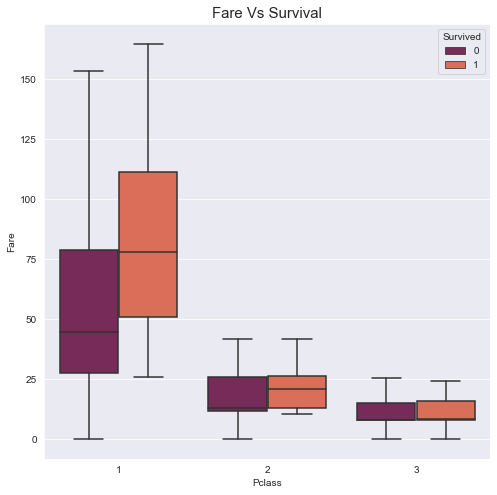

In [18]:
sns.boxplot(x='Pclass', y='Fare', data=df_train, showfliers=False, hue='Survived', palette='rocket')
plt.title('Fare vs Survival'.title(), fontsize=15);

<font color="darkviolet">Passengers with higher fares were more likely to survive. For Class 3 passengers, median fare values for both survived and deceased passengers were the same which strongly suggests that preference was given to class 1 and 2 passengers

## Relationship between Age and Survival

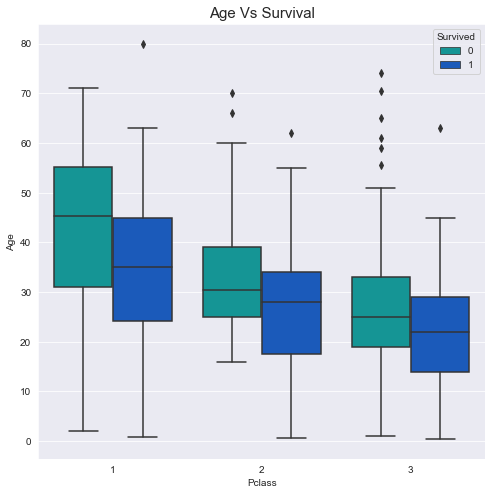

In [19]:
sns.boxplot(x='Pclass', y='Age', data=df_train, hue='Survived', showfliers=True, palette="winter_r")
plt.title('Age vs Survival'.title(), fontsize=15);

- <font color= "darkviolet">Age of passengers in class 1 is more dispersed than those in remaining classes. 
- <font color= "darkviolet">Median age of passengers also varies ascendingly from class 3 to class 1.
- <font color= "darkviolet">For all classes, median age of deseased passengers is greater than survived passenger

## Feature Engineering

In [20]:
data = df_train.copy()

In [21]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


We have two columns SibSp (Siblings and Spouse) and Parch(Parents and Children) in the dataset. These columns if combined forms the strength of the family of a passenger. let's create a new column Family representing the strength of the passengers' families.

In [22]:
data['Family']= data['SibSp'] + data['Parch']
data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0


Let's also add another column indicating whether a passenger is traveling 'alone' or in 'group'. If the value in 'Family' is 0 then we append 'alone' otherwise, we will append 'group'.

In [23]:
data['travelling_alone']=data['Family'].apply(lambda x: 1 if x==0 else 0)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,travelling_alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1


As we have seen from the EDA, passengers who paid lesser were more likely to lose their lives. We will also add column "middle_class" in which we will append 1 if their fare is between 0 to 30 USD else we will append 0.

In [24]:
data['middle_class']=data['Fare'].apply(lambda x: 1 if (x>=0) and (x<=30) else 0)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,travelling_alone,middle_class
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,0,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,1,1


In [25]:
data.corr()["Survived"].sort_values(ascending=False)

Survived            1.000000
Fare                0.257307
Parch               0.081629
Family              0.016639
PassengerId        -0.005007
SibSp              -0.035322
Age                -0.077221
travelling_alone   -0.203367
middle_class       -0.242191
Pclass             -0.338481
Name: Survived, dtype: float64

- <font color= 'darkviolet'> travelling_alone attribute shows stronger relationship than Parch, SibSp and Family.
- <font color= "darkviolet">The relation of middle_class is almost equal in magnitude to Fare but it is inversely related to the target variable
- We will therefore cosider two added attributes <font color= "tomato">**middle_class**</font> and <font color= "tomato">**tavelling_alone**</font> for training our model

# Data Preperation for Model

In [26]:
# Seperating features and labels
data=df_train.drop("Survived", axis=1)
labels= df_train["Survived"]

In [27]:
titanic = data.copy()

In [28]:
titanic.drop(columns=["PassengerId", "Name", "Ticket"], inplace=True )
titanic.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,male,22.0,1,0,7.2500,NaN,S
1,1,female,38.0,1,0,71.2833,C85,C
2,3,female,26.0,0,0,7.9250,NaN,S
3,1,female,35.0,1,0,53.1000,C123,S
4,3,male,35.0,0,0,8.0500,NaN,S


## Missing Values

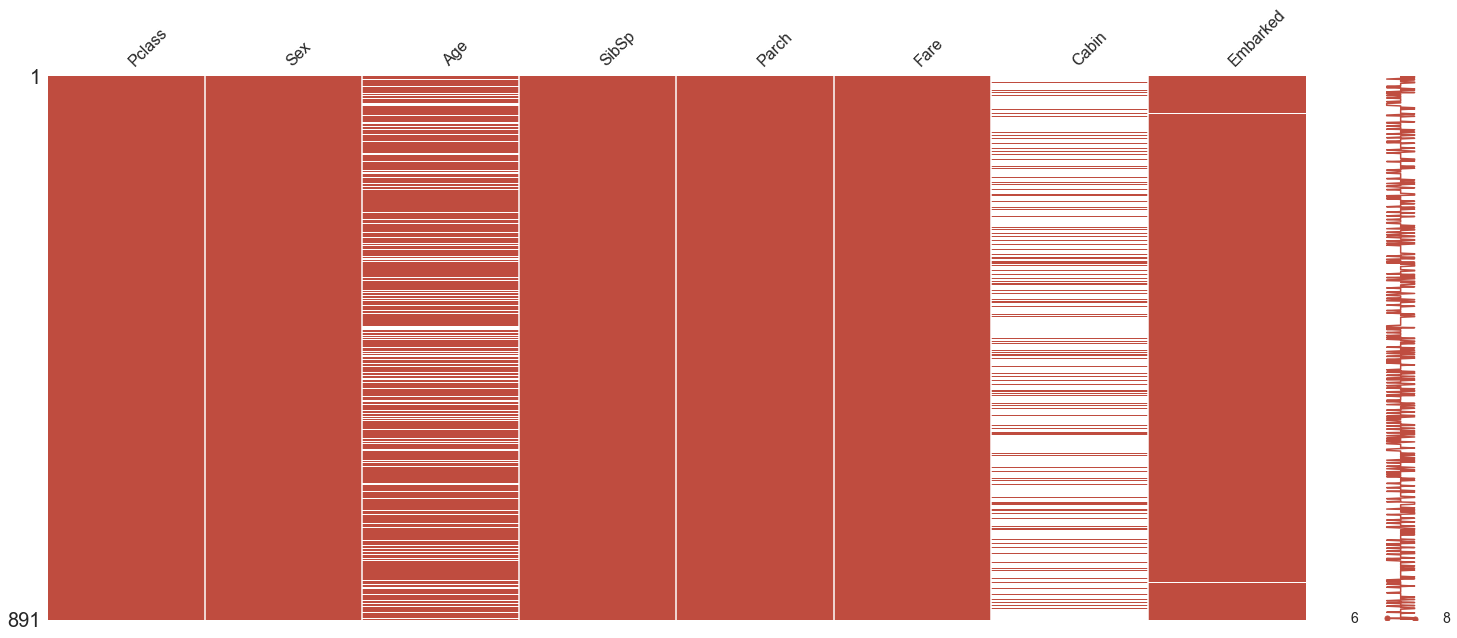

In [29]:
# heatmap for complete dataset to check missing values
msno.matrix(titanic,color=(0.75, 0.3, 0.25));

In [30]:
titanic.isna().sum()

Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [31]:
# getting percentage of missing values 
titanic.isna().mean()*100

Pclass       0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

- <font color="darkviolet">Out of 891 records, there are 177 values are missing from the Age column which is 19% of the total entries. As it is still not significantly high, we can replace these values imputation technique. 
- Critically, around 77% of Cabin data is missing. Dropping rows for these values will adversely affect our dataset and analysis. 
- In addition, 2 entries are also unavailable in Embarked column.

### Cabin Column

<font color="darkviolet">Since 77% of cabin entries are missing, it will not make sense to replace these values. So we will completely drop the cabin column

In [32]:
titanic.drop(columns=['Cabin'], inplace=True)

### Embarked Column

In [33]:
# first seperating numberical and categorical columns
titanic_num= titanic[["Pclass", "Age", "SibSp", "Parch", "Fare"]]
titanic_cat = titanic[["Sex", "Embarked"]]

<font color="darkviolet">Only 2 entries are missing from the Embarked column. We will replace missing values with mode, i.e. port S

In [34]:
df_mode = titanic_cat.copy()
mode_imputer = SimpleImputer(strategy="most_frequent")
df_mode.iloc[:, 1:] = mode_imputer.fit_transform(df_mode.iloc[:, 1:])

In [35]:
df_mode.isna().sum()

Sex         0
Embarked    0
dtype: int64

In [36]:
# mean imputation
df_mean = titanic_num.copy()
mean_imputer = SimpleImputer(strategy = "mean")
df_mean.iloc[:,:] = mean_imputer.fit_transform(df_mean)

In [37]:
# median imputation
df_median =titanic_num.copy()
median_imputer = SimpleImputer(strategy = "median")
df_median.iloc[:,:] = median_imputer.fit_transform(df_median)

In [38]:
# KNN imputation
df_knn = titanic_num.copy()
knn_imputer = KNNImputer()
df_knn.iloc[:,:]= knn_imputer.fit_transform(df_knn)

In [39]:
# MICE imputation
df_mice= titanic_num.copy()
mice_imputer = IterativeImputer()
df_mice.iloc[:,:]= mice_imputer.fit_transform(df_mice)

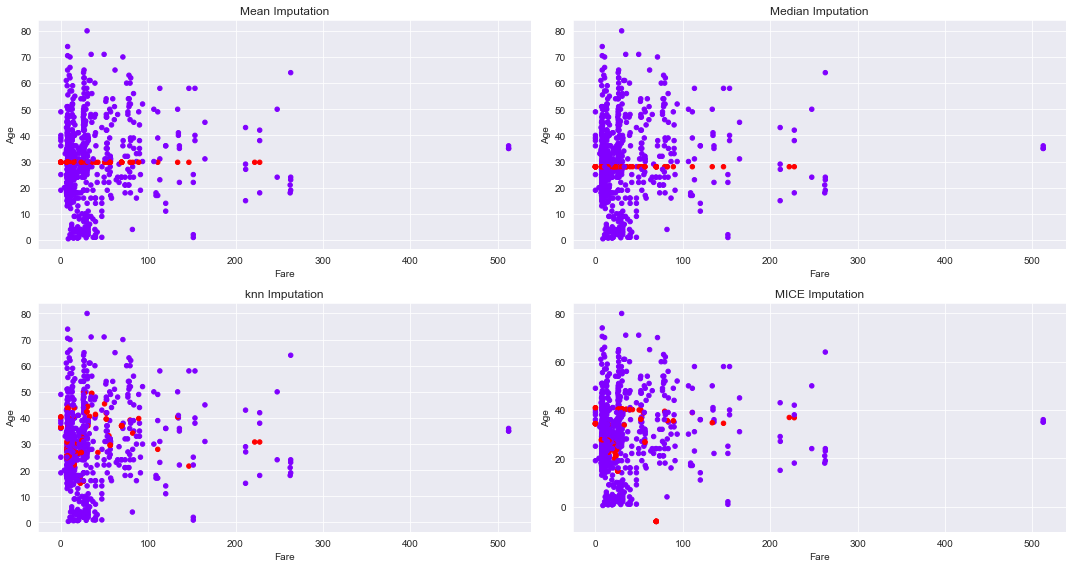

In [40]:
# let's analyse all above imputation results visually
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15,8))

nullity = titanic["Age"].isna()
imputations = {"Mean Imputation": df_mean,
               "Median Imputation": df_median,
               "knn Imputation": df_knn,
              "MICE Imputation": df_mice}

for ax, key in zip(ax.flatten(), imputations):
    
    imputations[key].plot(x = "Fare", y = "Age", kind="scatter", 
                             ax=ax, c=nullity, cmap="rainbow", title=key, colorbar=None)
    

    plt.tight_layout();

The graphs are plotted with Fare values on x-axis and Age on y-axis. Imputed values are represented by red dots. 
- <font color="darkviolet">Mean and Median imputation techniques fill constant values so, we see the imputed missing values along the straight horizontal line</font>
- <font color="darkviolet">As KNN and MICE Imputation techniques are distance based, values are imputed based on nearest distance to the other observations. Hence, they give results close to the original data. </font>

Before we select the imputation method, lets also have a look at the Age distribution. Ideally our manual imputation should not alter the original distribution.

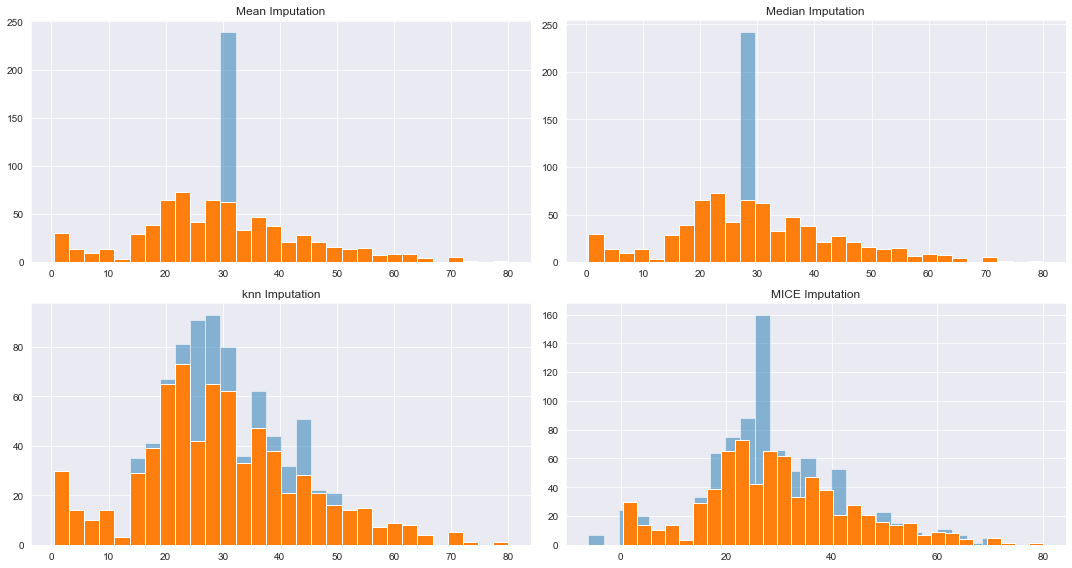

In [41]:
# Checking the effect of imputation on the original distribution
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize=(15,8))

imputations = {"Mean Imputation": df_mean,
               "Median Imputation": df_median,
               "knn Imputation": df_knn,
              "MICE Imputation": df_mice}

for ax, key in zip(ax.flatten(), imputations):
    imputations[key].hist("Age", bins=30, ax=ax, alpha=0.5)
    titanic.hist("Age",bins=30, ax=ax)
    ax.set_title(key)
    plt.tight_layout()

<font color="orange">Orange - Old Distribution

 <font color="blue"> Blue - New Distribution

- <font color="darkviolet">Mean, Median and even MICE imputation alter the distribution. The scale of the distibution is significantly changing as imputed values are clustered around certain age. 
- <font color="darkviolet">On the other hand, KNN is maintaining the original distribution. Since we have imputed the values, the new distribution (in blue) is appeared to be shadowing the original distribution.</font>


Therefore, we will select the <font color = 'tomato'>**KNN Imputation**</font> for replacing the missing values

# Encoding

In [42]:
cat_encoder = OneHotEncoder(drop="first")

In [43]:
titanic_cat_ohe = cat_encoder.fit_transform(df_mode)

In [44]:
titanic_cat_ohe

<891x3 sparse matrix of type '<class 'numpy.float64'>'
	with 1300 stored elements in Compressed Sparse Row format>

In [45]:
cat_encoder.categories_

[array(['female', 'male'], dtype=object), array(['C', 'Q', 'S'], dtype=object)]

# Scaling

In [46]:
scaled_titanic = df_knn.copy()

In [47]:
scaler = StandardScaler()

In [48]:
scaled_titanic[["Age", "Fare"]] = scaler.fit_transform(scaled_titanic[["Age", "Fare"]])

In [49]:
scaled_titanic.head()

,Pclass,Age,SibSp,Parch,Fare
0,3.0,-0.596146,1.0,0.0,-0.502445
1,1.0,0.586615,1.0,0.0,0.786845
2,3.0,-0.300456,0.0,0.0,-0.488854
3,1.0,0.364848,1.0,0.0,0.420730
4,3.0,0.364848,0.0,0.0,-0.486337


# Custom Transformer

In feature engineering section, we have constructed 3 new combined attributes i.e Family, travelling_alone, and middle_class. From the pearson's correlation, we came to know that <font color='tomato'>**travelling_alone**</font> and <font color='tomato'>**middle class**</font> have significant relation with the target variable. So, in this section, we will create our custom class by adding sklearn's BaseEstimator and TransformerMixin as base-class so that we can still use the set_params() and get_params() methods to hypertune our model.

In [50]:
titanic_num.head()

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500


In [51]:
sibch_index, parch_index, fare_index = 2,3,4

class CombineedAttributesAdder(BaseEstimator, TransformerMixin):

    def __init__(self, add_travelling_alone=True, add_middle_class=True):
        self.add_travelling_alone=add_travelling_alone
        self.add_middle_class= add_middle_class

    def fit(self, X):
        return self 

    def transform(self, X, y=None):
        family = X[:, sibch_index] +X[:, parch_index]
        family = family
        
        travelling_alone=[]
        for val in family:
            if val==0:
                travelling_alone.append(1)
            else:
                travelling_alone.append(0)

        middle_class = []
        for fare_val in X[:, fare_index]:
            if (fare_val >=0) and (fare_val<=30):
                middle_class.append(1)
            else:
                middle_class.append(0)

        if (self.add_travelling_alone) & (self.add_middle_class): 
            return np.c_[X, travelling_alone, middle_class]

        elif (self.add_middle_class) & (~self.add_travelling_alone): 
            return np.c_[X, middle_class]

        elif (~self.add_middle_class) & (self.add_travelling_alone):
            return np.c_[X, travelling_alone]

        else:
            return X



In [52]:
attr_adder= CombineedAttributesAdder(add_travelling_alone=True, add_middle_class=True)

In [53]:
titanic_extra_attrbs= attr_adder.transform(titanic_num.values)

In [54]:
pd.DataFrame(titanic_extra_attrbs)

,0,1,2,3,4,5,6
0,3.0,22.0,1.0,0.0,7.2500,0.0,1.0
1,1.0,38.0,1.0,0.0,71.2833,0.0,0.0
2,3.0,26.0,0.0,0.0,7.9250,1.0,1.0
3,1.0,35.0,1.0,0.0,53.1000,0.0,0.0
4,3.0,35.0,0.0,0.0,8.0500,1.0,1.0
...,...,...,...,...,...,...,...
886,2.0,27.0,0.0,0.0,13.0000,1.0,1.0
887,1.0,19.0,0.0,0.0,30.0000,1.0,1.0
888,3.0,NaN,1.0,2.0,23.4500,0.0,1.0
889,1.0,26.0,0.0,0.0,30.0000,1.0,1.0


# Pipeline

In [55]:
numeric_pipeline = Pipeline([
    ('num_imputer', KNNImputer()),
    ('attr_adder', CombineedAttributesAdder(add_middle_class=True, add_travelling_alone=True))
])

In [56]:
categorical_pipeline = Pipeline([
    ('cat_imputer', SimpleImputer(strategy="most_frequent")),
    ('encoder', OneHotEncoder())
])

In [57]:
full_pipeline = ColumnTransformer([
    ('num', numeric_pipeline, list(titanic_num)),
    ('cat', categorical_pipeline, list(titanic_cat)),
])

In [58]:
preprocessed_titanic = full_pipeline.fit_transform(titanic)

In [59]:
scaler = StandardScaler()
preprocessed_titanic_scaled= scaler.fit_transform(preprocessed_titanic)

In [60]:
pd.DataFrame(preprocessed_titanic_scaled)

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.827377,-0.596146,0.432793,-0.473674,-0.502445,-1.231645,0.596795,-0.737695,0.737695,-0.482043,-0.307562,0.615838
1,-1.566107,0.586615,0.432793,-0.473674,0.786845,-1.231645,-1.675617,1.355574,-1.355574,2.074505,-0.307562,-1.623803
2,0.827377,-0.300456,-0.474545,-0.473674,-0.488854,0.811922,0.596795,1.355574,-1.355574,-0.482043,-0.307562,0.615838
3,-1.566107,0.364848,0.432793,-0.473674,0.420730,-1.231645,-1.675617,1.355574,-1.355574,-0.482043,-0.307562,0.615838
4,0.827377,0.364848,-0.474545,-0.473674,-0.486337,0.811922,0.596795,-0.737695,0.737695,-0.482043,-0.307562,0.615838
...,...,...,...,...,...,...,...,...,...,...,...,...
886,-0.369365,-0.226533,-0.474545,-0.473674,-0.386671,0.811922,0.596795,-0.737695,0.737695,-0.482043,-0.307562,0.615838
887,-1.566107,-0.817914,-0.474545,-0.473674,-0.044381,0.811922,0.596795,1.355574,-1.355574,-0.482043,-0.307562,0.615838
888,0.827377,-0.241318,0.432793,2.008933,-0.176263,-1.231645,0.596795,1.355574,-1.355574,-0.482043,-0.307562,0.615838
889,-1.566107,-0.300456,-0.474545,-0.473674,-0.044381,0.811922,0.596795,-0.737695,0.737695,2.074505,-0.307562,-1.623803


With all this hard work, we have now successfully processed the training dataset in order to feed it to the model for training. Let's now move to the part which I was desparately waiting for...... i.e. Creating the machine learning model!!!!

# Model Creation

In [61]:
X_train = preprocessed_titanic_scaled.copy()
y_train = labels

## Logistic Regression

In [62]:
lr = LogisticRegression()

In [63]:
lr.fit(X_train, y_train)

LogisticRegression()

In [64]:
def display_results (test, pred):
    print("confusion matrix is:")
    print(confusion_matrix(test, pred))
    print('======================================================') 
    print("Accuracy score is:", accuracy_score(test, pred))  
    print('======================================================') 
    print("Precision is : ", precision_score(test, pred))
    print('======================================================') 
    print("Recall is : ", recall_score(test, pred))
    print('======================================================') 
    print("F1 score is : ", f1_score(test, pred))
    print('======================================================') 
    print("Classification report is:")
    print(classification_report(test, pred))

In [65]:
y_train_pred = lr.predict(X_train)
acc_lr =accuracy_score(y_train, y_train_pred)
f1_lr =f1_score(y_train, y_train_pred)

In [66]:
display_results(y_train, y_train_pred)

confusion matrix is:
[[474  75]
 [ 99 243]]
Accuracy score is: 0.8047138047138047
Precision is :  0.7641509433962265
Recall is :  0.7105263157894737
F1 score is :  0.7363636363636363
Classification report is:
              precision    recall  f1-score   support

           0       0.83      0.86      0.84       549
           1       0.76      0.71      0.74       342

    accuracy                           0.80       891
   macro avg       0.80      0.79      0.79       891
weighted avg       0.80      0.80      0.80       891



## SGD Classifier

In [67]:
sgd = SGDClassifier()

In [68]:
sgd.fit(X_train, y_train)

SGDClassifier()

In [69]:
y_train_pred_sgd = sgd.predict(X_train)

In [70]:
acc_sgd =accuracy_score(y_train, y_train_pred_sgd)
f1_sgd =f1_score(y_train, y_train_pred_sgd)

In [71]:
display_results(y_train, y_train_pred_sgd)

confusion matrix is:
[[349 200]
 [129 213]]
Accuracy score is: 0.6307519640852974
Precision is :  0.5157384987893463
Recall is :  0.6228070175438597
F1 score is :  0.5642384105960264
Classification report is:
              precision    recall  f1-score   support

           0       0.73      0.64      0.68       549
           1       0.52      0.62      0.56       342

    accuracy                           0.63       891
   macro avg       0.62      0.63      0.62       891
weighted avg       0.65      0.63      0.64       891



### KNN Classifier

While using KNN classifier, the first challenge comes as we have to select the optimum value of K i.e number of neighbors. As seen above, we have plotted K against the error rate. If we select very low value of K, it will overfit the model and viceversa. We will use GridSearchCV() to find the optimum value for K

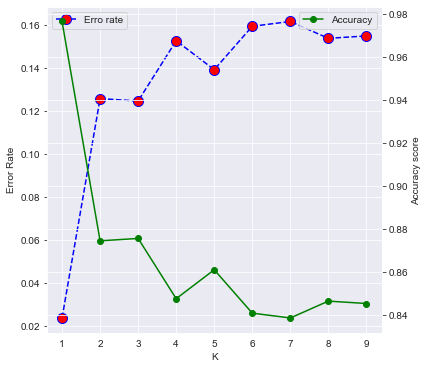

In [72]:
error_rate = []
accuracy = []

# Will take some time
for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_train_pred_knn1 = knn.predict(X_train)
    error_rate.append(np.mean(y_train_pred_knn1 != y_train))
    acc= accuracy_score(y_train, y_train_pred_knn1)
    accuracy.append(acc)

# Lets plot the k-value and error rate

fig, ax1 = plt.subplots(figsize = (6,6))
ax1.plot(range(1,10),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10, label='Erro rate')
ax1.set_xlabel('K')
ax1.set_ylabel('Error Rate')
plt.legend()

ax2 = ax1.twinx()

ax2.plot(range(1,10), accuracy, color='green',marker='o', label='Accuracy')
ax2.set_ylabel('Accuracy score')
plt.legend()
plt.show()

In [73]:
KNN1 = KNeighborsClassifier()
knn_cv = GridSearchCV(KNN1, {'n_neighbors':range(15)}, scoring='accuracy', n_jobs=-1, verbose=1, cv=3)
knn_cv.fit(X_train, y_train)
best_params_knn = knn_cv.best_params_
print(f"Best paramters: {best_params_knn})")

Fitting 3 folds for each of 15 candidates, totalling 45 fits
Best paramters: {'n_neighbors': 10})


In [74]:
KNN = KNeighborsClassifier(list(best_params_knn.values())[0])

In [75]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [76]:
y_train_pred_knn = KNN.predict(X_train)

In [77]:
acc_knn =accuracy_score(y_train, y_train_pred_knn)
f1_knn =f1_score(y_train, y_train_pred_knn)

In [78]:
display_results(y_train, y_train_pred_knn)

confusion matrix is:
[[514  35]
 [108 234]]
Accuracy score is: 0.8395061728395061
Precision is :  0.8698884758364313
Recall is :  0.6842105263157895
F1 score is :  0.7659574468085106
Classification report is:
              precision    recall  f1-score   support

           0       0.83      0.94      0.88       549
           1       0.87      0.68      0.77       342

    accuracy                           0.84       891
   macro avg       0.85      0.81      0.82       891
weighted avg       0.84      0.84      0.83       891



### Support Vector machine

In [79]:
svc = SVC()

In [80]:
params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C':[float(x) for x in (range(30))],
    'decision_function_shape':["ovo", "ovr"] 
}

svc_cv = GridSearchCV(svc, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
svc_cv.fit(X_train, y_train)
best_params_svc=svc_cv.best_params_
print("best_params: ", best_params_svc)

Fitting 3 folds for each of 180 candidates, totalling 540 fits
best_params:  {'C': 2.0, 'decision_function_shape': 'ovo', 'kernel': 'rbf'}


In [81]:
svc_best_prams = SVC(C=list(best_params_svc.values())[0], 
                    decision_function_shape=list(best_params_svc.values())[1], 
                    kernel=list(best_params_svc.values())[2])
svc_best_prams.fit(X_train, y_train)

SVC(C=2.0, decision_function_shape='ovo')

In [82]:
y_train_pred_svc = svc_best_prams.predict(X_train)

In [83]:
acc_svc =accuracy_score(y_train, y_train_pred_svc)
f1_svc =f1_score(y_train, y_train_pred_svc)

In [84]:
display_results(y_train, y_train_pred_svc)

confusion matrix is:
[[525  24]
 [113 229]]
Accuracy score is: 0.8462401795735129
Precision is :  0.9051383399209486
Recall is :  0.6695906432748538
F1 score is :  0.7697478991596638
Classification report is:
              precision    recall  f1-score   support

           0       0.82      0.96      0.88       549
           1       0.91      0.67      0.77       342

    accuracy                           0.85       891
   macro avg       0.86      0.81      0.83       891
weighted avg       0.85      0.85      0.84       891



# Decision Tree

In [85]:
decision_tree = DecisionTreeClassifier(random_state=42)

In [86]:
params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4],    
    "min_samples_leaf":list(range(1, 20))}

In [87]:
tree_cv = GridSearchCV(decision_tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)

tree_cv.fit(X_train,y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'})


In [88]:
decision_tree_best_params = DecisionTreeClassifier(criterion= list(best_params.values())[0], 
                                                    max_depth=list(best_params.values())[1], 
                                                    min_samples_leaf= list(best_params.values())[2], 
                                                    min_samples_split = list(best_params.values())[3], 
                                                    splitter=list(best_params.values())[4])

In [89]:
decision_tree_best_params.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=3,
                       splitter='random')

In [90]:
y_train_pred_tree = decision_tree_best_params.predict(X_train)

In [91]:
acc_tree =accuracy_score(y_train, y_train_pred_tree)
f1_tree =f1_score(y_train, y_train_pred_tree)

In [92]:
display_results(y_train, y_train_pred_tree)

confusion matrix is:
[[506  43]
 [108 234]]
Accuracy score is: 0.8305274971941639
Precision is :  0.8447653429602888
Recall is :  0.6842105263157895
F1 score is :  0.7560581583198709
Classification report is:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87       549
           1       0.84      0.68      0.76       342

    accuracy                           0.83       891
   macro avg       0.83      0.80      0.81       891
weighted avg       0.83      0.83      0.83       891



## Random Forest

In [93]:
n_estimators = [int(x) for x in np.linspace(start=200, stop=2000, num=20)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10,15, 20]
min_samples_leaf = [1, 2, 4, 6, 8,10]
bootstrap = [True, False]

#dictionary for hyperparameters
random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth, 'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf, 'bootstrap': bootstrap}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='accuracy',param_distributions=random_grid, n_iter=100, cv=3, 
                               verbose=2, random_state=42, n_jobs=-1)

rf_cv.fit(X_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   0.3s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=200; total time=   0.3s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1526; total time=   1.8s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1526; total time=   2.1s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=1621; total time=   2.1s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1526; total time=   2.2s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1147; total time=   1.9s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=1621; total time=   2.4s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=1621; total time=   2.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1147; total time=   1.9s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=578; total time=   0.9s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=578; total time=   0.9s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=578; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=578; total time=   1.0s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1147; total time=   1.9s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1621; total time=   1.9s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1621; total time=   1.9s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=578; total time=   0.9s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=578; total time=   1.0s
[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1621; total time=   2.3s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=673; total time=   1.1s
[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=673; total time=   1.0s
[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=673; total time=   1.2s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1147; total time=   1.8s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1905; total time=   2.6s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1147; total time=   1.7s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1905; total time=   2.5s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1905; total time=   2.5s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=768; total time=   1.2s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=768; total time=   1.2s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=6, min_samples_split=15, n_estimators=389; total time=   0.6s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=6, min_samples_split=15, n_estimators=389; total time=   0.5s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=6, min_samples_split=15, n_estimators=389; total time=   0.6s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=1147; total time=   1.8s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=484; total time=   0.6s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=484; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=484; total time=   0.8s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=768; total time=   1.3s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=484; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=484; total time=   0.7s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=484; total time=   0.7s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=484; total time=   0.7s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=484; total time=   0.7s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=389; total time=   0.6s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=484; total time=   0.7s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=389; total time=   0.6s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=389; total time=   0.8s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=1621; total time=   2.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=673; total time=   1.1s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=673; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=8, min_samples_split=20, n_estimators=673; total time=   0.9s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=1621; total time=   2.2s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=1621; total time=   2.3s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1052; total time=   1.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1052; total time=   1.7s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=863; total time=   1.1s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=863; total time=   1.2s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=863; total time=   1.2s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=1052; total time=   1.7s
[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1431; total time=   1.8s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1431; total time=   1.9s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=80, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=1431; total time=   1.9s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1242; total time=   1.8s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1431; total time=   2.5s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1431; total time=   2.4s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1431; total time=   2.5s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1242; total time=   1.9s
[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.4s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=2, n_estimators=1242; total time=   2.0s
[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.3s
[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=200; total time=   0.4s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1242; total time=   2.0s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=957; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1242; total time=   2.2s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1242; total time=   2.1s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=957; total time=   1.2s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=15, n_estimators=957; total time=   1.6s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1052; total time=   1.4s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1052; total time=   1.3s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=10, min_samples_split=15, n_estimators=1052; total time=   1.6s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=2000; total time=   2.6s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=2000; total time=   2.7s
[CV] END bootstrap=False, max_depth=60, max_features=auto, min_samples_leaf=10, min_samples_split=5, n_estimators=2000; total time=   2.9s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=1431; total time=   1.9s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=200; total time=   0.3s
[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=1431; total time=   2.0s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, max_depth=None, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=1431; total time=   1.7s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=768; total time=   1.2s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=768; total time=   1.2s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=768; total time=   1.4s
[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=1715; total time=   2.7s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=389; total time=   0.6s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=389; total time=   0.5s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=1715; total time=   2.7s
[CV] END bootstrap=True, max_depth=60, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=1715; total time=   2.8s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=389; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=1905; total time=   2.5s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=1905; total time=   2.4s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=8, min_samples_split=10, n_estimators=1905; total time=   2.4s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=1242; total time=   1.5s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1431; total time=   2.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1431; total time=   2.2s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=1431; total time=   2.1s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=1242; total time=   1.8s
[CV] END bootstrap=False, max_depth=40, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=1242; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=863; total time=   1.3s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=863; total time=   1.3s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=389; total time=   0.5s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=389; total time=   0.4s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=863; total time=   1.4s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=10, min_samples_split=20, n_estimators=389; total time=   0.6s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=1242; total time=   1.5s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=1242; total time=   1.7s
[CV] END bootstrap=False, max_depth=100, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=1242; total time=   1.8s
[CV] END bootstrap=True

/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, max_depth=60, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=389; total time=   0.5s
[CV] END bootstrap=False, max_depth=40, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1905; total time=   2.2s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=673; total time=   1.3s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=863; total time=   1.5s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=863; total time=   1.8s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1905; total time=   2.7s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=2000; total time=   2.9s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1905; total time=   3.0s
[CV] END bootstrap=False, max_depth=90, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=1905; total time=   2.9s
[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=2000; total time=   3.3s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=True, max_depth=20, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=2000; total time=   3.5s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=1, min_samples_split=15, n_estimators=863; total time=   1.6s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1336; total time=   1.8s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1336; total time=   1.4s
[CV] END bootstrap=False, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=2, n_estimators=1336; total time=   1.7s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1526; total time=   2.3s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1526; total time=   2.5s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=10, min_samples_split=20, n_estimators=1526; total time=   2.7s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1715; total time=   2.7s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=1147; total time=   1.9s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=1147; total time=   1.9s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1715; total time=   2.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=10, min_samples_split=10, n_estimators=1715; total time=   2.5s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=578; total time=   0.6s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=578; total time=   0.7s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=389; total time=   0.5s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=389; total time=   0.5s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=8, min_samples_split=15, n_estimators=578; total time=   0.9s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=1147; total time=   1.9s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=389; total time=   0.6s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=1905; total time=   2.9s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=863; total time=   1.3s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=863; total time=   1.2s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=1905; total time=   3.2s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=1905; total time=   3.4s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1810; total time=   2.5s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=863; total time=   1.4s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1810; total time=   2.8s
[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=1810; total time=   2.7s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=1336; total time=   2.1s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=1336; total time=   2.5s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=1336; total time=   2.3s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=1621; total time=   2.4s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=1621; total time=   2.4s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=6, min_samples_split=10, n_estimators=1621; total time=   2.6s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1431; total time=   2.4s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1431; total time=   2.4s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1431; total time=   2.2s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1431; total time=   2.7s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1431; total time=   2.7s
[CV] END bootstrap=True, max_depth=80, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=1431; total time=   2.6s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1431; total time=   2.5s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1431; total time=   2.4s
[CV] END bootstrap=True, max_depth=90, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=1431; total time=   2.4s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1715; total time=   2.8s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1715; total time=   2.9s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=1810; total time=   2.2s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1715; total time=   2.8s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1336; total time=   2.2s
[CV] END bootstrap=True, max_depth=30, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1336; total time=   2.3s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=1810; total time=   2.7s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=8, min_samples_split=20, n_estimators=1810; total time=   2.4s
[CV] END bootstrap=True, max_dept

/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=1147; total time=   1.7s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=1147; total time=   1.9s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   2.4s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   2.8s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.9s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   2.9s
[CV] END bootstrap=False, max_depth=70, max_features=sqrt, min_samples_leaf=8, min_samples_split=2, n_estimators=2000; total time=   2.7s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=2000; total time=   3.3s
[CV] END bootstrap=False, max_

/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, max_depth=70, max_features=auto, min_samples_leaf=4, min_samples_split=15, n_estimators=1147; total time=   1.4s
[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=484; total time=   0.8s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=863; total time=   1.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=863; total time=   1.3s
[CV] END bootstrap=False, max_depth=20, max_features=auto, min_samples_leaf=2, min_samples_split=20, n_estimators=863; total time=   1.3s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1526; total time=   1.9s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1526; total time=   2.2s
[CV] END bootstrap=False, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1526; total time=   2.3s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1336; total time=   1.9s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1336; total time=   2.0s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=768; total time=   1.4s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=768; total time=   1.3s
[CV] END bootstrap=False, max_depth=110, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1336; total time=   1.9s
[CV] END bootstrap=True, max_depth=110, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=768; total time=   1.1s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   0.3s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=768; total time=   1.2s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   0.5s
[CV] END bootstrap=False, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=294; total time=   0.4s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=2000; total time=   2.9s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=2000; total time=   2.9s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=768; total time=   1.2s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=768; total time=   1.3s
[CV] END bootstrap=False, max_depth=30, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=2000; total time=   3.1s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=673; total time=   1.2s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=673; total time=   1.1s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1336; total time=   2.1s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1242; total time=   1.8s
[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1336; total time=   2.3s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=30, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1336; total time=   2.3s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1242; total time=   2.2s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=1242; total time=   2.0s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=484; total time=   0.7s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=484; total time=   0.9s
[CV] END bootstrap=True, max_depth=40, max_features=auto, min_samples_leaf=6, min_samples_split=10, n_estimators=484; total time=   0.9s
[CV] END bootstrap=True, max_depth=20, max_features=auto, min_samples_leaf=6, min_samples_split=20, n_estimators=673; total time=   1.2s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=294; total time=   0.7s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=294; total time=   0.5s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=294; total time=   0.6s
[CV] END bootstrap=False, max_depth=80, max_

/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'

[CV] END bootstrap=False, max_depth=80, max_features=sqrt, min_samples_leaf=10, min_samples_split=5, n_estimators=2000; total time=   2.9s
[CV] END bootstrap=False, max_depth=50, max_features=auto, min_samples_leaf=4, min_samples_split=10, n_estimators=1810; total time=   2.7s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1431; total time=   2.4s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=673; total time=   1.1s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1431; total time=   2.1s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=673; total time=   1.3s
[CV] END bootstrap=True, max_depth=100, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=673; total time=   1.6s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=863; total time=   1.0s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=4, min_samples_split=10, n_estimators=1431; total time=   2.4s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=863; total time=   1.1s
[CV] END bootstrap=False, max_depth=50, max_features=sqrt, min_samples_leaf=8, min_samples_split=5, n_estimators=863; total time=   1.2s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=1052; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1810; total time=   3.1s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1810; total time=   3.1s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=1052; total time=   1.6s
[CV] END bootstrap=True, max_depth=70, max_features=sqrt, min_samples_leaf=2, min_samples_split=20, n_estimators=1052; total time=   1.8s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=1810; total time=   3.1s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=1336; total time=   2.3s
[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=1147; total time=   1.7s
[CV] END bootstrap=True, max_depth=90, max_features=auto, min_samples_leaf=1, min_samples_split=20, n_estimators=1336; total time=   2.8s
[CV] END bootstrap=True, max_de

/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=110, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=1147; total time=   1.9s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=294; total time=   0.5s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=1431; total time=   2.2s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=294; total time=   0.7s
[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=1431; total time=   2.4s
[CV] END bootstrap=True, max_depth=10, max_features=auto, min_samples_leaf=2, min_samples_split=15, n_estimators=294; total time=   0.5s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=60, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=1431; total time=   2.1s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=1621; total time=   2.4s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=1621; total time=   2.7s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=4, min_samples_split=15, n_estimators=1621; total time=   3.1s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1810; total time=   2.8s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1810; total time=   3.4s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1810; total time=   3.1s
[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1810; total time=   2.8s
[CV] END bootstrap=True, max_depth=40, max_features=sqrt, min_samples_leaf=1, min_samples_split=20, n_estimators=1810; total time=   3.3s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=False, max_depth=110, max_features=auto, min_samples_leaf=2, min_samples_split=10, n_estimators=1810; total time=   3.0s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=1621; total time=   2.6s


/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/Users/mayurdushetwar/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:425: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=1621; total time=   2.7s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=1052; total time=   1.8s
[CV] END bootstrap=True, max_depth=10, max_features=sqrt, min_samples_leaf=6, min_samples_split=20, n_estimators=1621; total time=   2.5s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1526; total time=   2.6s
[CV] END bootstrap=True, max_depth=70, max_features=auto, min_samples_leaf=8, min_samples_split=5, n_estimators=1052; total time=   1.7s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1526; total time=   2.7s
[CV] END bootstrap=True, max_depth=100, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=1526; total time=   2.7s
[CV] END bootstrap=True, max_depth=7

In [94]:
rf_clf_best_params = RandomForestClassifier(n_estimators=list(rf_best_params.values())[0], 
                                            min_samples_split=list(rf_best_params.values())[1], 
                                            min_samples_leaf=list(rf_best_params.values())[2], 
                                            max_features=list(rf_best_params.values())[3], 
                                            max_depth=list(rf_best_params.values())[4], 
                                            bootstrap=list(rf_best_params.values())[5])

In [95]:
#rf_clf_best_params = RandomForestClassifier(n_estimators=863, 
                                            #min_samples_split=15, 
                                            #min_samples_leaf=1, 
                                            #max_features='auto', 
                                            #max_depth=20, 
                                            #bootstrap=True)

In [96]:
rf_clf_best_params.fit(X_train, y_train)

RandomForestClassifier(max_depth=20, max_features='auto', min_samples_split=15,
                       n_estimators=863)

In [97]:
y_train_pred_rf = rf_clf_best_params.predict(X_train)

In [98]:
acc_rf =accuracy_score(y_train, y_train_pred_rf)
f1_rf =f1_score(y_train, y_train_pred_rf)

In [99]:
display_results(y_train, y_train_pred_rf)

confusion matrix is:
[[521  28]
 [ 79 263]]
Accuracy score is: 0.8799102132435466
Precision is :  0.9037800687285223
Recall is :  0.7690058479532164
F1 score is :  0.8309636650868879
Classification report is:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       549
           1       0.90      0.77      0.83       342

    accuracy                           0.88       891
   macro avg       0.89      0.86      0.87       891
weighted avg       0.88      0.88      0.88       891



# Classifier Selection

In [100]:
def classifiers_grid(train_data,train_lables):

    grid_dict = {
        'classifiers': ['Logistic_Regression', 'SGDClassifier', 'KNeighborsClassifier', 'SVC', 'Decision_Tree', 'Random_Forest'],
        'accuracy': [acc_lr, acc_sgd, acc_knn, acc_svc, acc_tree, acc_rf],
        'F1_Score': [f1_lr, f1_sgd, f1_knn, f1_svc, f1_tree, f1_rf]
    }

    grid1 = pd.DataFrame.from_dict(grid_dict)
    
    # K-Fold Closs Validation K=3

    classifiers =[lr, sgd, KNN, svc_best_prams, decision_tree_best_params, rf_clf_best_params]

    cv_dict ={}
    class_names=['Logistic_Regression', 'SGDClassifier', 'KNeighborsClassifier', 'SVC', 'Decision_Tree', 'Random_Forest']
    mean_accuracy_list= []
    std_dev_list=[]
    for classifier in classifiers:
        accuracy = cross_val_score(classifier, X_train, y_train, cv=3, scoring='accuracy')
        mean_accuracy=np.mean(accuracy)
        std_dev =np.std(accuracy)

        mean_accuracy_list.append(mean_accuracy)
        std_dev_list.append(std_dev)

    cv_dict['classifiers']=class_names
    cv_dict['mean_accuracy']=mean_accuracy_list
    cv_dict['standard_deviation']=std_dev_list
        

    grid2= pd.DataFrame.from_dict(cv_dict)
    
    grid = grid1.merge(grid2, on="classifiers", how="left")

    return grid

In [101]:
classifiers_grid(X_train, y_train).style.background_gradient(subset=["accuracy", "F1_Score", "mean_accuracy", "standard_deviation"], cmap="flare")

,classifiers,accuracy,F1_Score,mean_accuracy,standard_deviation
0,Logistic_Regression,0.804714,0.736364,0.785634,0.011111
1,SGDClassifier,0.630752,0.564238,0.740741,0.043641
2,KNeighborsClassifier,0.839506,0.765957,0.812570,0.004199
3,SVC,0.846240,0.769748,0.827160,0.009655
4,Decision_Tree,0.830527,0.756058,0.797980,0.033332
5,Random_Forest,0.879910,0.830964,0.820426,0.006919


<font color="darkviolet">After comparing all of the 6 classifiers which we so far tested, Random Forest gives the best accuracy score and F1_score. Additionally, its standard deviation is also very less and nearer to KNeighborclassifier and Support vector classifier. 

Remember our custom class CombinedAttributeAdder().....

Above grid is obtained when we add both combined attributes, i.e. travelling_alone and middle_class. On backend, I have also created the same classifier grid for each of other remaining conditions, lets also have a look at them

#### add_travelling_alone=True, add_middle_class=True

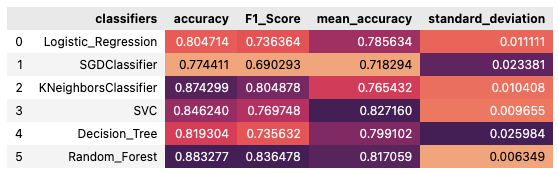


#### add_travelling_alone=False, add_middle_class=False

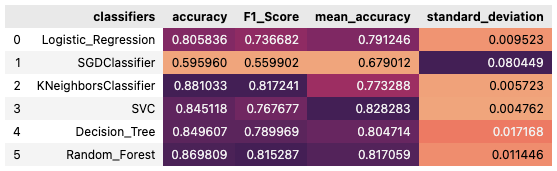

#### add_travelling_alone=False, add_middle_class=True

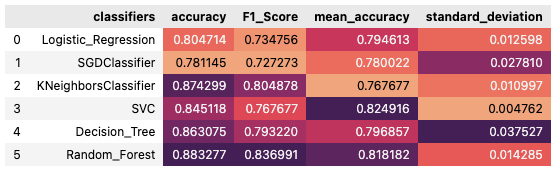

#### add_travelling_alone=True, add_middle_class=False

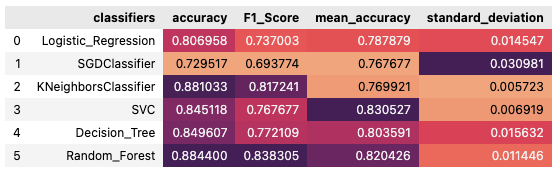

These are the classifiers grid tables calculated for different combinations of combined attributes created during feature engineering. 

- <font color="darkviolet"> We can see that adding new attributes does increase the accuracy and F1_score of the model. 
- But, when we add them, there is not much difference in accuracy and F1 scores after adding either one of them or both at a time . 
- Nonetheless, by adding both the attributes, we get much lesser standard deviation for accuracy score during cross validation. It means when we add both attributes, the fluctutions of accuracy scores from its mean value get reduced.</font>

Hence, we will select <font color='tomato' >***Random Forest Classifier***</font> as our model for the project with both the combined attributes.

# Performance Interpretation of Random Forest Classifier

So far we have mostly looked at the Accuracy score of the classifier. Let us now also understand what other metrics tell us about the selected random forest classifier

### Confusion Matrix

Confusion matrix is one of the better ways to understand the performance in more than one dimension. It is not only useful to tell on how many instances our model correctly predicts but also tells us in what ways our model is incorrecty behaving in the terms of False Positives and False Negatives. Each row in a confusion matrix represents an actual class, while each column represents a predicted class. 

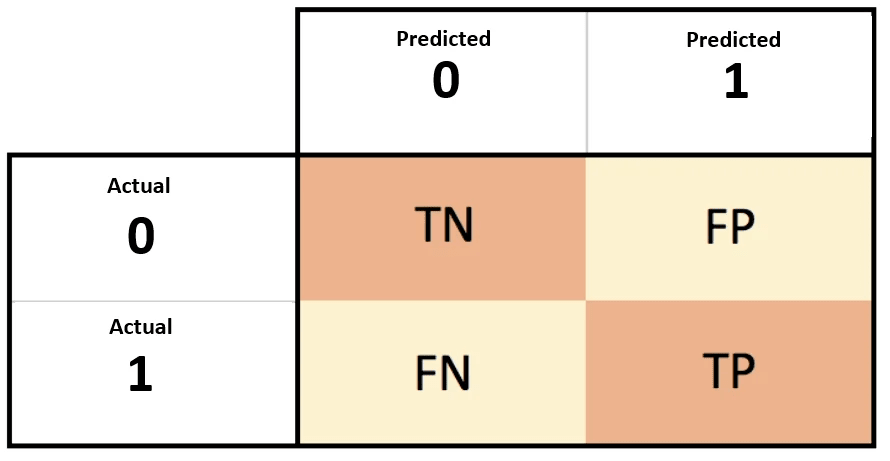

In [103]:
confusion_matrix(y_train, y_train_pred_rf)

array([[521,  28],
       [ 79, 263]])

In [104]:
pd.crosstab(y_train, y_train_pred_rf)

col_0,0,1
Survived,,
0,521,28
1,79,263


<font color="darkviolet"> The first row of this matrix considers deseased passengers i.e.the negative class: first 520 passengers were correctly predicted as 'not survived' (True Negative); while remaining 29 passengers were actually deseased but our model say that they are survived. Second row is the positive class. In other words, it represents passengers who survived. As we see on bottom right, random forest classifier predicts 265 instances correctly as survived (True Positive); On the other hand, on 77 instances, the model incorrectly predicted the passengers to be not-survived but in fact they were alive.

### Precision

Confusion Matrix has already offered us a lot of information. However, let us interprete the results in concised manner. One such metric is the Precision Score. It can be defined as the accuracy of the positive predictions i.e. Out of total instance where our model predicted the passengers to be alive, how many of them were actually alive. </font>

Mathematically, precision can be given as:

                precision = True Positives / (True Postives + False Postives)

In [105]:
precision_score(y_train, y_train_pred_rf)

0.9037800687285223

<font color="darkviolet"> 90%!!!Seems good! It can be also in a way that 10% of the instances, our model wrongly predicted passengers as survived where in fact, they were dead.

### Recall

Recall is also called as sensitivity or true positive rate of the model. Precision is often used along with the Recall as considering only precision score may lead to wrong interpretation. It can be defined as the ratio of positive instances that are correctly detected by the model. </font>

Mathematically, recall is given as:

            Recall = True Positves / (True Positives + False Negatives)

In [106]:
 recall_score(y_train, y_train_pred_rf)

0.7690058479532164

<font color="darkviolet"> Sensitivity of our model is almost 77% which is quiet low. This can be interpreted as, out of 100 instances where passengers is survived, the classifier catched 77 instances correctly.

### F1_score

So far, we have used the precision and recall seperately. But is there a way, we can use them together? Of course, there is! It is called as the F1_score. F1_score is calculated by taking the harmonic mean of the precision and recall. If we take normal mean, it will treat both the values equally and get easily influenced by much higher or lower values of precision or recall. On the contrary, Harmonic mean will punish the model if any of the precision or recall score is lower. 

Mathematically. F1_score is calculated as:

                                        2
               F1_score =  -----------------------------
                                 1               1
                             -----------  +   --------
                              Precision        Recall
                                                            

In [107]:
f1_score(y_train, y_train_pred_rf)

0.8309636650868879

<font color="darkviolet"> So the selected model is offering 83% F1_score. </font>

F1_score favors classifiers that have similar precision and recall. However, some of us might want to have a model giving higher values for both Precision and Recall. Here is bad news! We cannot have it in both way. While we try to increase one, we have to sacrifice the other. This is also called as the precision-recall tradeoff in machine learning language. In such case, what ideal values for precision and recall should we take? 

### Precision/Recall Tradeoff

Random Forest works on the probabitly that the given instance belong to the particular class. For each instance, the model computes the probability and if the probibility is greater than the threshold, it assigns the instance to the positive class, or else it assigns it to the negative class. But to find the right tradeoff between precision and recall, it is crucial to know which threshold to use

In [108]:
y_probas = cross_val_predict(rf_clf_best_params, X_train, y_train, cv=3, method='predict_proba')

#selecting probabilities of positive class
y_probas_survived = y_probas[:,1]

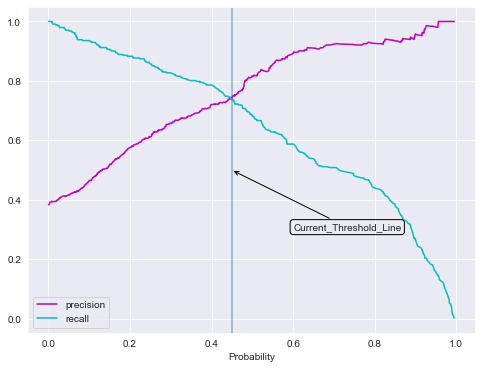

In [109]:
precision, recall, threshold= precision_recall_curve(y_train, y_probas_survived)

plt.figure(figsize=(8,6))
plt.plot(threshold, precision[:-1], color='m', label='precision')
plt.plot(threshold, recall[:-1], color='c', label='recall')
plt.xlabel('Probability')
#
plt.annotate('Current_Threshold_Line', (0.45, 0.5), (0.6, 0.3),
            arrowprops=dict(arrowstyle="->",connectionstyle="Arc3", color="k"),
            bbox = dict(boxstyle = "round", fc ="none", ec="k"))
plt.axvline(0.45, alpha=0.5)
plt.legend();

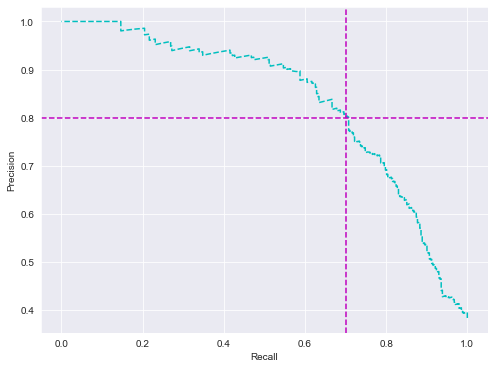

In [110]:
plt.figure(figsize=(8,6))
plt.plot(recall, precision, 'c--')
plt.axhline(0.8, color='m', linestyle='dashed')
plt.axvline(0.70, color='m',linestyle='dashed')
plt.xlabel('Recall')
plt.ylabel('Precision');

<font color="darkviolet"> The way of choosing right tradeoff point depends on the project. From the above graph we can observed that the precision starts falling rapidly at 60% recall. Just to have optimum value of both precision and recall, we would select intersection of two dotted lines as the tradeoff. But again, decision is solely depends on who is building the model and for what purpose. You might have different tradeoff in mind. That's completely fine!

### ROC Curve

There is another way to look the tradeoff for binary classification problem. It is called as ROC (Receiver Operating Characteristic)curve. It is similar to Precision/Recall curve, but instead of plotting precision vs Recall, ROC curve plots True Positive Rate(recall or Sensitivity) against the False Positive Rate. 

False Positive Rate can also be written as:

                    False Positive Rate = 1 - True Negative Rate

We usually call True Negative Rate as Specificity. Hence the above equation becomes:

                    False Positive Rate = 1 - Specificity


Hence, we can interprete the ROC curve as the plot of Sensitivity against Specificity.

In [111]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_train, y_probas_survived)

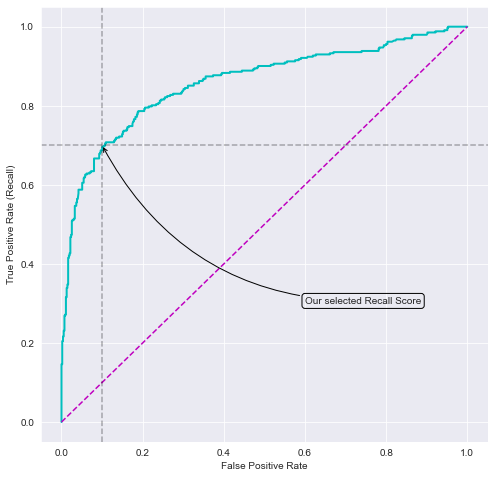

In [112]:
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, color="c")
plt.plot([0,1], [0,1], "m--")
plt.axhline(0.7, color="k", alpha = 0.3, linestyle = "--")
plt.axvline(0.1, color = "k", alpha=0.3, linestyle="--")
plt.annotate('Our selected Recall Score', (0.1, 0.7), (0.6, 0.3),
            arrowprops=dict(arrowstyle="->",connectionstyle="arc3,rad=-0.3", color="k"),
            bbox = dict(boxstyle = "round", fc ="none", ec="k"))
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)");

<font color="darkviolet"> As we can see, if we go for higher True Positive Rate (recall), False Positive Rate also increases very slowly till recall score of 60% and but then it accelerates afterwards. At our selected recall score of 70%, false positive rate is 10% i.e. On 10 instances, our model is wrongly predicting the passengers as survived but actually they are not.</font>

With this curve, we can actually see the tradeoff between true positive rate (recall) and false positive rate. Higher the recall more the false positive rate. The best model is the one for which the ROC curve stays as far away from the red line as possible (i.e. towards the top left corner). 

We can also use the area under the ROC curve (ROC AUC score) to measure the performance of the model. An Ideal classifier would have ROC AUC equal to 1. Lets check what is the ROC AUC score of our selected random forest model

In [113]:
roc_auc_score(y_train, y_probas_survived)

0.8587783210302623

We would still take it for now. Of course, there are many different ways to tweak and hypertune the model and possibly increase this performance even further. For now, we will limit our attempt to how we have developed and selected this model so far. There are still few algorithms and techniques which I have not yet used. I will keep them reserved for the next version of the project.


To wrap things up, let's move to the final part of this project, where we transform the test dataset using our full_pipeline() and standard scaling. Then we will pass the test dataset through our trained model to predict the results.

# Submission

In [114]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [115]:
titanic_test = df_test.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])

In [116]:
# Transformation using full_pipeline() and StandardScaler
preprocessed_test_set = full_pipeline.transform(titanic_test)
preprocessed_test_scaled = scaler.transform(preprocessed_test_set)

In [117]:
y_test_pred = rf_clf_best_params.predict(preprocessed_test_scaled)

In [118]:
y_test_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [119]:
submission = pd.read_csv('gender_submission.csv')
submission["Survived"] = y_test_pred
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [120]:
submission.to_csv('submission.csv')